In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sbn

meta_path = "Data/Mouse_metadata.csv"
results_path = "Data/Study_results.csv"

# Read School and Student Data File and store into Pandas Data Frames
meta_df = pd.read_csv(meta_path)
results_df = pd.read_csv(results_path)

# Combine the data into a single dataset
merge_df = pd.merge(meta_df, results_df, on=("Mouse ID"), how=("outer"))
merge_df.head(20)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

In [21]:
merge_df["Mouse ID"].value_counts()

g989    13
g288    10
l897    10
u364    10
g316    10
        ..
b447     1
f932     1
x226     1
l872     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [22]:
duplicates = merge_df[merge_df["Mouse ID"] == "g989"]
duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [23]:
drop_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)

In [24]:
hangers = drop_df[drop_df["Mouse ID"] == "g989"]
hangers

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [25]:
drop_df = drop_df.drop([918, 919, 920])

drop_df.head(20)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

In [26]:
drug_group = drop_df.groupby(["Drug Regimen"])
drug_table = {
    "mean" : drug_group["Tumor Volume (mm3)"].mean(),
    "median" : drug_group["Tumor Volume (mm3)"].median(),
    "variance" : drug_group["Tumor Volume (mm3)"].var(),
    "standard deviation" : drug_group["Tumor Volume (mm3)"].std(),
    "SEM" : drug_group["Tumor Volume (mm3)"].sem()
}
drug_frame = pd.DataFrame(data=drug_table)
drug_frame

mean     median   variance  standard deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

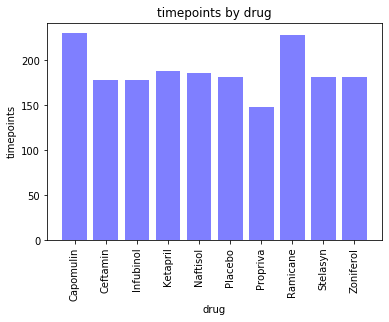

In [27]:
number_mice = drop_df.groupby("Drug Regimen")[["Mouse ID"]].count()
number_mice = number_mice.iloc[:,0]
x_axis = np.arange(len(number_mice))
tick_place = [value for value in x_axis]
plt.bar(x_axis, number_mice, color="b", alpha=0.5, align="center")
plt.xticks(tick_place, number_mice.index, rotation="vertical")
plt.title("timepoints by drug")
plt.xlabel("drug")
plt.ylabel("timepoints")
plt.show()

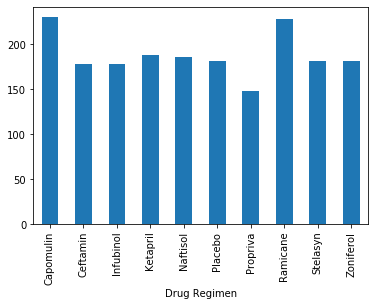

In [28]:
number_mice.plot(kind="bar")


AttributeError: 'list' object has no attribute 'astype'

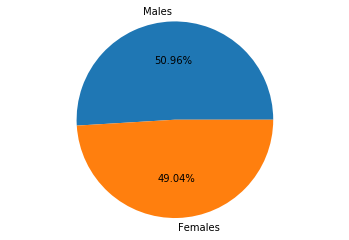

In [64]:
females = len(drop_df[drop_df["Sex"] == "Female"])
males = len(drop_df[drop_df["Sex"] == "Male"])

sex = ["Males", "Females"]
numbers = [males, females]

plt.pie(numbers, labels=sex, autopct="%1.2f%%")
plt.axis("equal")

plt.show()

In [133]:

drug_df = drop_df[drop_df["Drug Regimen"] == "Capomulin" + "Ramicane" + "Infubinol" + "Ceftamin"]
drug_df.head()


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

SyntaxError: invalid syntax (<ipython-input-131-f640d3ab9591>, line 1)

In [121]:

for mouse in drop_df.iteritems():
   
    mouse = drop_df["Mouse ID"]
    
    
   

KeyError: "None of [Index([('k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'x401', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'm601', 'g791', 'g791', 'g791', 'g791', 'g791', 'g791', 'g791', 'g791', 'g791', 'g791', 's508', 's508', 's508', 's508', 's508', 's508', 's508', 's508', 's508', 's508', 'f966', 'f966', 'f966', 'f966', 'f966', 'm546', 'm546', 'm546', 'm546', 'm546', 'm546', 'm546', 'm546', 'm546', 'm546', 'z578', 'z578', 'z578', 'z578', 'z578', 'z578', 'z578', 'z578', 'z578', 'z578', 'j913', 'j913', 'j913', 'j913', 'j913', 'j913', 'j913', 'j913', 'j913', 'j913', 'u364', 'u364', 'u364', 'u364', 'u364', ...)], dtype='object')] are in the [index]"

In [36]:
test_mouse = drop_df[drop_df["Mouse ID"] == "s185"]

test_mouse = test_mouse.drop(["Drug Regimen", "Sex", "Age_months","Weight (g)", "Metastatic Sites"], axis=1)
test_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)
10     s185          0           45.000000
11     s185          5           43.878496
12     s185         10           37.614948
13     s185         15           38.177232
14     s185         20           36.866876
15     s185         25           33.949940
16     s185         30           32.959671
17     s185         35           28.328531
18     s185         40           25.472143
19     s185         45           23.343598

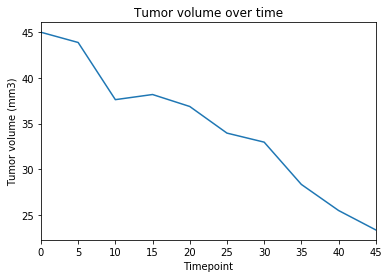

In [63]:
x_axis = test_mouse["Timepoint"]
vol = test_mouse["Tumor Volume (mm3)"]

plt.xlabel("Timepoint")
plt.ylabel("Tumor volume (mm3)")
plt.xlim(0, 45)
plt.title("Tumor volume over time")
plt.plot(x_axis, vol)

In [43]:
cap_regimen = drop_df[drop_df["Drug Regimen"] == "Capomulin"]
cap_regimen

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496                 0  
12             37.614948                 0  
13             38.177232                 0  
14             36.866876                 0  
...                  ...               ...  
440            47.685963                 1  
1452           45.000000                 0  
1453           45.597064                 0  
1454           46.059608                 0  
1455           46.539206                 0  

[230 rows x 8 columns]

Text(0.5, 1.0, 'Tumor volume against weight')

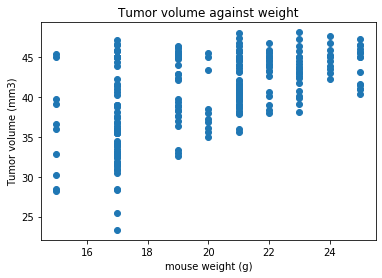

In [135]:

mouse_weight = cap_regimen["Weight (g)"]
mouse_avg = cap_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, tumor_vol)
plt.ylabel("Tumor volume (mm3)")
plt.xlabel("mouse weight (g)")
plt.title("Tumor volume against weight")

#regress_line = sps.linregress(mouse_weight, tumor_vol)
#sbn.lmplot(x=mouse_weight,y=tumor_vol,data=regress_line,fit_reg=True) 

In [103]:
coef = np.corrcoef(mouse_weight, tumor_vol)